In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### `Correlation between GDP and S&P500`
In this exercise, you want to analyze stock returns from the S&P 500. You believe there may be a relationship between the returns of the S&P 500 and the GDP of the US. Merge the different datasets together to compute the correlation.

Two tables have been provided for you, named __sp500__, and __gdp__. As always, __pandas__ has been imported for you as __pd__.

In [50]:
data = {
    'date': [2008, 2009, 2010, 2011, 2012, 2014, 2015, 2016, 2017, 2013],
    'returns': [-38.49, 23.45, 12.78, 0.00, 13.41, 11.39, -0.73, 9.54, 19.42, 29.60]
}

sp500 = pd.DataFrame(data)
print(sp500)

   date  returns
0  2008   -38.49
1  2009    23.45
2  2010    12.78
3  2011     0.00
4  2012    13.41
5  2014    11.39
6  2015    -0.73
7  2016     9.54
8  2017    19.42
9  2013    29.60


In [51]:
gdp = pd.read_csv('../../datasets/gdp.csv')
gdp.head()

,country,year,gdp
0,USA,2010,1.499000e+13
1,USA,2011,1.554000e+13
2,USA,2012,1.620000e+13
3,USA,2012,1.620000e+13
4,USA,2013,1.678000e+13


#### Quest 1 CH-4
- Use __merge_ordered()__ to merge __gdp__ and __sp500__ using a __left join__ on __year__ and __date__. Save the results as __gdp_sp500__.
- Print __gdp_sp500__ and look at the returns for the year 2018.
- Use __merge_ordered()__, again similar to before, to merge __gdp__ and __sp500__ use the function's ability to interpolate missing data to forward fill the missing value for returns, assigning this table to the variable __gdp_sp500__
- Subset the __gdp_sp500__ table, select the __gdp__ and __returns__ columns, and save as __gdp_returns__.
- Print the correlation matrix of the __gdp_returns__ table using the __.corr()__ method.

In [52]:
# Use merge_ordered() to merge gdp and sp500 on year and date
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', how='left')

# Print gdp_sp500
print(gdp_sp500)

  country  year           gdp    date  returns
0     USA  2010  1.499000e+13  2010.0    12.78
1     USA  2011  1.554000e+13  2011.0     0.00
2     USA  2012  1.620000e+13  2012.0    13.41
3     USA  2012  1.620000e+13  2012.0    13.41
4     USA  2013  1.678000e+13  2013.0    29.60
5     USA  2014  1.752000e+13  2014.0    11.39
6     USA  2015  1.822000e+13  2015.0    -0.73
7     USA  2016  1.871000e+13  2016.0     9.54
8     USA  2017  1.949000e+13  2017.0    19.42
9     USA  2018  2.049000e+13     NaN      NaN


In [53]:
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', how='left', fill_method='ffill')

print(gdp_sp500)


  country  year           gdp  date  returns
0     USA  2010  1.499000e+13  2010    12.78
1     USA  2011  1.554000e+13  2011     0.00
2     USA  2012  1.620000e+13  2012    13.41
3     USA  2012  1.620000e+13  2012    13.41
4     USA  2013  1.678000e+13  2013    29.60
5     USA  2014  1.752000e+13  2014    11.39
6     USA  2015  1.822000e+13  2015    -0.73
7     USA  2016  1.871000e+13  2016     9.54
8     USA  2017  1.949000e+13  2017    19.42
9     USA  2018  2.049000e+13  2017    19.42


In [54]:
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', how='left',  fill_method='ffill')

# Subset the gdp and returns columns
gdp_returns = gdp_sp500[['gdp','returns']]

# Print gdp_returns correlation
print (gdp_returns.corr())

              gdp   returns
gdp      1.000000  0.211734
returns  0.211734  1.000000


#### `Phillips curve using merge_ordered()`
There is an economic theory developed by A. W. Phillips which states that inflation and unemployment have an inverse relationship. The theory claims that with economic growth comes inflation, which in turn should lead to more jobs and less unemployment.

You will take two tables of data from the U.S. Bureau of Labor Statistics, containing unemployment and inflation data over different periods, and create a Phillips curve. The tables have different frequencies. One table has a data entry every six months, while the other has a data entry every month. You will need to use the entries where you have data within both tables.

The tables __unemployment__ and __inflation__ have been loaded for you.

In [55]:
inflation = pd.read_excel('../../datasets/inflation.xlsx')
inflation.head()

,date,cpi,seriesid,data_type
0,2014-01-01,235.288,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
1,2014-02-01,235.547,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
2,2014-03-01,236.028,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
3,2014-04-01,236.468,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
4,2014-05-01,236.918,CUSR0000SA0,SEASONALLY ADJUSTED INDEX


In [56]:
unemployment = pd.read_excel('../../datasets/unemployment.xlsx')
unemployment.head()

,date,unemployment_rate
0,2013-06-01,7.5
1,2014-01-01,6.7
2,2014-06-01,6.1
3,2015-01-01,5.6
4,2015-06-01,5.3


- Use __merge_ordered()__ to merge the __inflation__ and __unemployment__ tables on __date__ with an __inner join__, and save the results as __inflation_unemploy__.
- Print the __inflation_unemploy__ variable.
- Using __inflation_unemploy__, create a scatter plot with __unemployment_rate__ on the horizontal axis and __cpi__ (inflation) on the vertical axis.

        date      cpi     seriesid                  data_type  \
0 2014-01-01  235.288  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
1 2014-06-01  237.231  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
2 2015-01-01  234.718  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
3 2015-06-01  237.684  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
4 2016-01-01  237.833  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
5 2016-06-01  240.167  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
6 2017-01-01  243.780  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
7 2017-06-01  244.182  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
8 2018-01-01  248.884  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
9 2018-06-01  251.134  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   

   unemployment_rate  
0                6.7  
1                6.1  
2                5.6  
3                5.3  
4                5.0  
5                4.9  
6                4.7  
7                4.3  
8                4.1  
9                4.0  


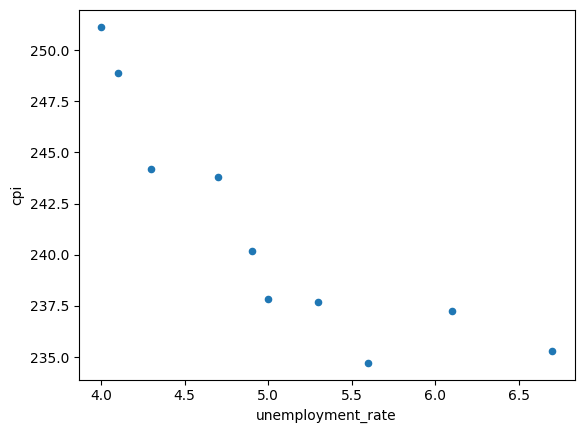

In [57]:
# Use merge_ordered() to merge inflation, unemployment with inner join
inflation_unemploy = pd.merge_ordered(inflation, unemployment, on='date', how='inner')

# Print inflation_unemploy 
print(inflation_unemploy)

# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy
inflation_unemploy.plot(x='unemployment_rate', y ='cpi', kind='scatter')
plt.show()

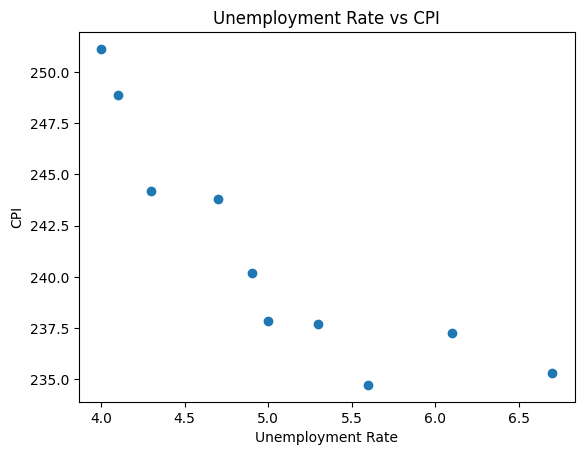

In [58]:
plt.scatter(inflation_unemploy['unemployment_rate'], inflation_unemploy['cpi'])

# Set labels and title
plt.xlabel('Unemployment Rate')
plt.ylabel('CPI')
plt.title('Unemployment Rate vs CPI')

# Display the plot
plt.show()

#### `merge_ordered() caution, multiple columns`
When using __merge_ordered()__ to merge on multiple columns, the order is important when you combine it with the forward fill feature. The function sorts the merge on columns in the order provided. In this exercise, we will merge GDP and population data from the World Bank for the Australia and Sweden, reversing the order of the merge on columns. The frequency of the series are different, the GDP values are quarterly, and the population is yearly. Use the forward fill feature to fill in the missing data. Depending on the order provided, the fill forward will use unintended data to fill in the missing values.

The tables __gdp__ and __pop__ have been loaded.

In [59]:
gdp = pd.read_excel('../../datasets/gdp.xlsx')
gdp.head()

,date,country,gdp,series_code
0,1990-01-01,Australia,158051.132,NYGDPMKTPSAKD
1,1990-04-01,Australia,158263.582,NYGDPMKTPSAKD
2,1990-07-01,Australia,157329.279,NYGDPMKTPSAKD
3,1990-09-01,Australia,158240.678,NYGDPMKTPSAKD
4,1991-01-01,Australia,156195.954,NYGDPMKTPSAKD


In [60]:
pop = pd.read_excel('../../datasets/pop.xlsx')
pop.head()

,date,country,pop,series_code
0,1990-01-01,Australia,17065100,SP.POP.TOTL
1,1991-01-01,Australia,17284000,SP.POP.TOTL
2,1992-01-01,Australia,17495000,SP.POP.TOTL
3,1993-01-01,Australia,17667000,SP.POP.TOTL
4,1990-01-01,Sweden,8558835,SP.POP.TOTL


1. Use __merge_ordered()__ on __gdp__ and __pop__, merging on columns __date__ and __country__ with the fill feature, save to __ctry_date__.

2. Perform the same merge of __gdp__ and __pop__, but join on __country__ and __date__ ___(reverse of step 1)___ with the fill feature, saving this as __date_ctry__.

In [61]:
# Merge gdp and pop on date and country with fill and notice rows 2 and 3
ctry_date = pd.merge_ordered(gdp, pop, on=('date', 'country'),  fill_method='ffill')

# Print ctry_date
print(ctry_date)

         date    country         gdp  series_code_x       pop series_code_y
0  1990-01-01     Sweden   79837.846  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
1  1990-01-01  Australia  158051.132  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
2  1990-04-01     Sweden   80582.286  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
3  1990-04-01  Australia  158263.582  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
4  1990-07-01     Sweden   79974.360  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
5  1990-07-01  Australia  157329.279  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
6  1990-09-01     Sweden   80106.497  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
7  1990-09-01  Australia  158240.678  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
8  1991-01-01     Sweden   79524.242  NYGDPMKTPSAKD   8617375   SP.POP.TOTL
9  1991-01-01  Australia  156195.954  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
10 1991-04-01     Sweden   79073.059  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
11 1991-04-01  Australia  155989.033  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
12 1991-07-0

In [62]:
# Merge gdp and pop on country and date with fill
date_ctry = pd.merge_ordered(gdp, pop, on=('country', 'date'), fill_method='ffill')

# Print date_ctry
print(date_ctry)

         date    country         gdp  series_code_x       pop series_code_y
0  1990-01-01     Sweden   79837.846  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
1  1990-04-01     Sweden   80582.286  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
2  1990-07-01     Sweden   79974.360  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
3  1990-09-01     Sweden   80106.497  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
4  1991-01-01     Sweden   79524.242  NYGDPMKTPSAKD   8617375   SP.POP.TOTL
5  1991-04-01     Sweden   79073.059  NYGDPMKTPSAKD   8617375   SP.POP.TOTL
6  1991-07-01     Sweden   79084.770  NYGDPMKTPSAKD   8617375   SP.POP.TOTL
7  1991-09-01     Sweden   79740.606  NYGDPMKTPSAKD   8617375   SP.POP.TOTL
8  1992-01-01     Sweden   79390.922  NYGDPMKTPSAKD   8668067   SP.POP.TOTL
9  1992-04-01     Sweden   79060.283  NYGDPMKTPSAKD   8668067   SP.POP.TOTL
10 1992-07-01     Sweden   78904.605  NYGDPMKTPSAKD   8668067   SP.POP.TOTL
11 1992-09-01     Sweden   76996.837  NYGDPMKTPSAKD   8668067   SP.POP.TOTL
12 1993-01-0

#### `Using merge_asof() to study stocks`
You have a feed of stock market prices that you record. You attempt to track the price every five minutes. Still, due to some network latency, the prices you record are roughly every 5 minutes. You pull your price logs for three banks, JP Morgan (JPM), Wells Fargo (WFC), and Bank Of America (BAC). You want to know how the price change of the two other banks compare to JP Morgan. Therefore, you will need to merge these three logs into one table. Afterward, you will use the __pandas .diff()__ method to compute the price change over time. Finally, plot the price changes so you can review your analysis.

The three log files have been loaded for you as tables named __jpm__, __wells__, and __bac__.

In [63]:
jpm = pd.read_excel('../../datasets/jpm.xlsx')
jpm.head()

,date_time,close
0,2017-11-17 15:35:17,98120
1,2017-11-17 15:40:04,98180
2,2017-11-17 15:45:01,97731
3,2017-11-17 15:50:55,97740
4,2017-11-17 15:55:00,97815


In [64]:
wells = pd.read_excel('../../datasets/wells.xlsx')
wells.head()

,date_time,close
0,2017-11-17 15:35:08,54323
1,2017-11-17 15:40:00,54320
2,2017-11-17 15:45:32,54190
3,2017-11-17 15:50:07,54170
4,2017-11-17 15:55:00,54184


In [65]:
bac = pd.read_excel('../../datasets/bac.xlsx')
bac.head()

,date_time,close
0,2017-11-17 15:35:17,26552
1,2017-11-17 15:40:06,26552
2,2017-11-17 15:45:05,26388
3,2017-11-17 15:50:34,26378
4,2017-11-17 15:55:06,26383


- Use __merge_asof()__ to merge __jpm__ (left table) and __wells__ together on the __date_time__ column, where the rows with the ___nearest___ times are matched, and with __suffixes=('', '_wells')__. Save to __jpm_wells__.
- Use __merge_asof()__ to merge __jpm_wells__ (left table) and __bac__ together on the date_time column, where the rows with the closest times are matched, and with __suffixes=('_jpm', '_bac')__. Save to __jpm_wells_bac__.
- Using __price_diffs__, create a line plot of the close price of JPM, WFC, and BAC only.

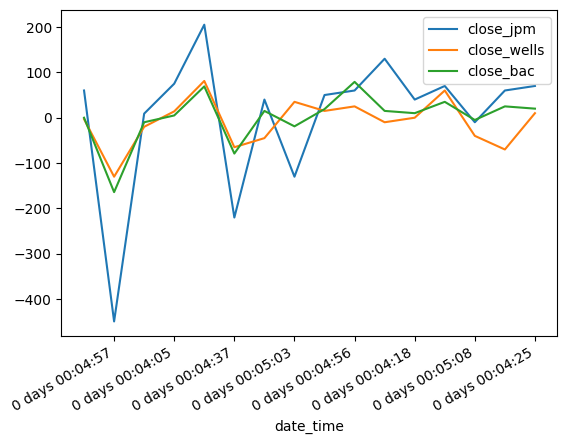

In [66]:
# Use merge_asof() to merge jpm and wells
jpm_wells = pd.merge_asof(jpm, wells, on='date_time', suffixes=('','_wells'), direction='nearest')


# Use merge_asof() to merge jpm_wells and bac
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on='date_time', suffixes=('_jpm', '_bac'), direction='nearest')


# Compute price diff
price_diffs = jpm_wells_bac.diff()

# Plot the price diff of the close of jpm, wells and bac only
price_diffs.plot(x='date_time' ,y=['close_jpm', 'close_wells', 'close_bac'])
plt.show()

#### `Using merge_asof() to create dataset`
The __merge_asof()__ function can be used to create datasets where you have a table of start and stop dates, and you want to use them to create a flag in another table. You have been given __gdp__, which is a table of quarterly GDP values of the US during the 1980s. Additionally, the table __recession__ has been given to you. It holds the starting date of every US recession since 1980, and the date when the recession was declared to be over. Use __merge_asof()__ to merge the tables and create a status flag if a quarter was during a recession. Finally, to check your work, plot the data in a bar chart.

The tables __gdp__ and __recession__ have been loaded for you.

In [67]:
gdp = pd.read_excel('../../datasets/gdp_rec.xlsx')
gdp.head()

,date,gdp
0,1979-01-01,2526610
1,1979-04-01,2591247
2,1979-07-01,2667565
3,1979-10-01,2723883
4,1980-01-01,2789842


In [68]:
recession = pd.read_excel('../../datasets/recession.xlsx')
recession.head()

,date,econ_status
0,1980-01-01,recession
1,1980-08-01,normal
2,1981-07-01,recession
3,1982-12-01,normal
4,1990-07-01,recession


- Using __merge_asof()__, merge __gdp__ and __recession__ on __date__, with __gdp__ as the __left table__. Save to the variable __gdp_recession__.
- Create a __list__ using a list comprehension and a conditional expression, named __is_recession__, where for each row if the __gdp_recession__['econ_status'] value is equal to 'recession' then enter '__r__' else '__g__'.
- Using __gdp_recession__, plot a bar chart of __gdp__ versus __date__, setting the color argument equal to __is_recession__.

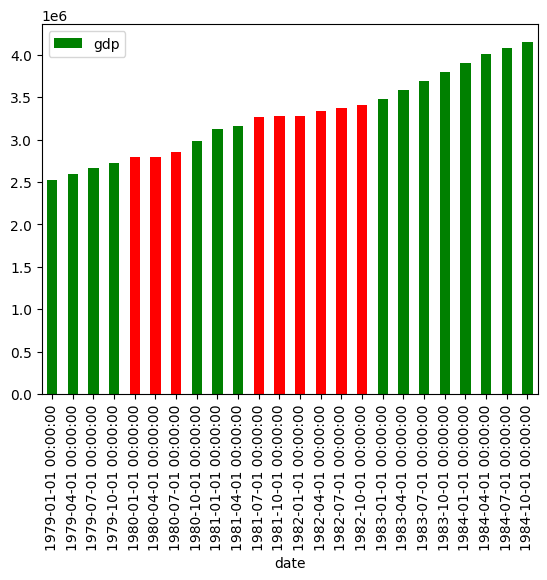

In [69]:
# Merge gdp and recession on date using merge_asof()
gdp_recession = pd.merge_asof(gdp, recession, on='date')

# Create a list based on the row value of gdp_recession['econ_status']
is_recession = ['r' if s=='recession' else 'g' for s in gdp_recession['econ_status']]

# Plot a bar chart of gdp_recession
gdp_recession.plot(kind='bar', y='gdp', x='date', color=is_recession, rot=90)
plt.show()


#### `merge_asof() and merge_ordered() differences`
The __merge_asof()__ and __merge_ordered()__ functions are similar in the type of merge they perform and the input arguments they use. In this exercise, think about how the functions are different.

- Drag and drop the statement into the appropriate box for either the __merge_asof()__ function, the __merge_ordered()__ function, or both if it applies to both functions.
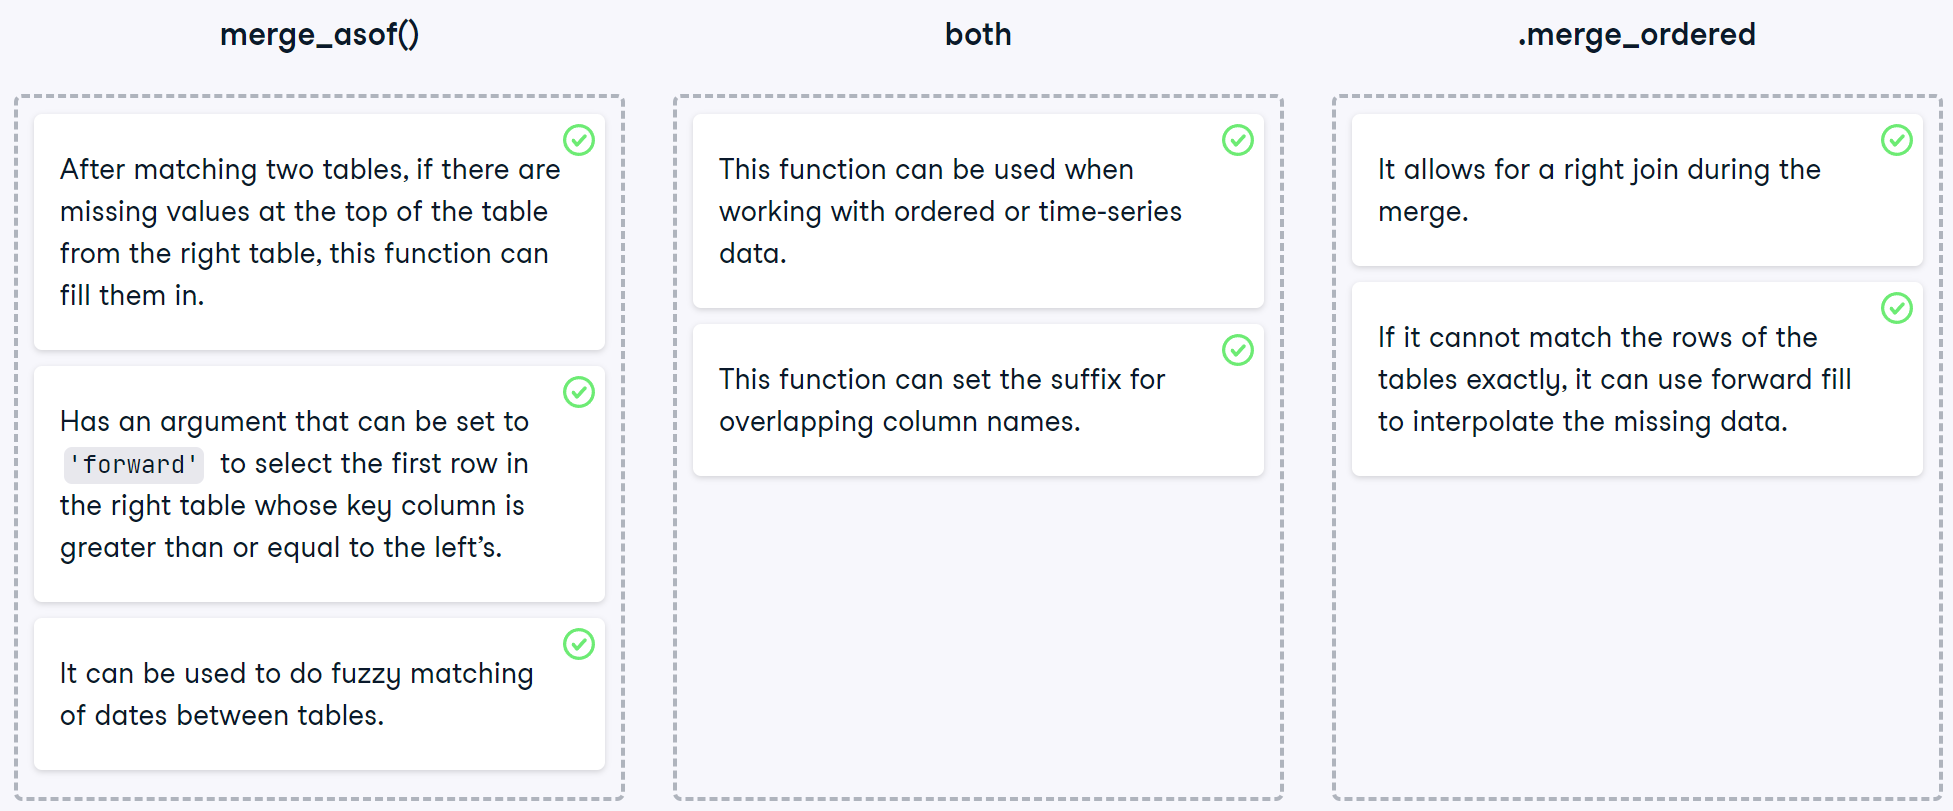

#### `Explore financials with .query()`
You have been given a table of financial data from some popular social network companies called __social_fin__. All of the values are in thousands of US dollars.

Use the __.query()__ method and the IPython shell to explore __social_fin__ and select the True statement.

In [70]:
social_fin = pd.read_excel('../../datasets/social_fin.xlsx')
social_fin.head()

,financial,company,year,value
0,total_revenue,twitter,2019,3459329
1,cost_of_revenue,twitter,2019,1137041
2,gross_profit,twitter,2019,2322288
3,operating_expenses,twitter,2019,1955915
4,net_income,twitter,2019,1465659


#### Possible answers
- There 2 rows where the value is greater than $50,000,000K.
- There are 3 rows for total revenue for Facebook.
- `There are 6 rows where the net income has a negative value`.
- There are 45 rows, where the gross profit is greater than $100K.

In [71]:
social_fin.query('value >= 50000000')

,financial,company,year,value
5,total_revenue,facebook,2019,70697000
7,gross_profit,facebook,2019,57927000
20,total_revenue,facebook,2018,55838000


In [72]:
num2 = social_fin.query('company == "facebook"').shape[0]
print('total revenue for facebook: ',num2)

total revenue for facebook:  20


In [73]:
num3 = social_fin.query('value < 0').shape[0]
print(num3)

7


In [74]:
num4 = social_fin.query('value > 100000').shape[0]
print(num4)

53


#### `Subsetting rows with .query()`
In this exercise, you will revisit GDP and population data for Australia and Sweden from the World Bank and expand on it using the __.query()__ method. You'll merge the two tables and compute the GDP per capita. Afterwards, you'll use the __.query()__ method to sub-select the rows and create a plot. Recall that you will need to merge on multiple columns in the proper order.

The tables __gdp__ and __pop__ have been loaded for you.

In [75]:
gdp = pd.read_excel('../../datasets/gdp.xlsx')
gdp.head()

,date,country,gdp,series_code
0,1990-01-01,Australia,158051.132,NYGDPMKTPSAKD
1,1990-04-01,Australia,158263.582,NYGDPMKTPSAKD
2,1990-07-01,Australia,157329.279,NYGDPMKTPSAKD
3,1990-09-01,Australia,158240.678,NYGDPMKTPSAKD
4,1991-01-01,Australia,156195.954,NYGDPMKTPSAKD


In [76]:
pop = pd.read_excel('../../datasets/pop.xlsx')
pop.head()

,date,country,pop,series_code
0,1990-01-01,Australia,17065100,SP.POP.TOTL
1,1991-01-01,Australia,17284000,SP.POP.TOTL
2,1992-01-01,Australia,17495000,SP.POP.TOTL
3,1993-01-01,Australia,17667000,SP.POP.TOTL
4,1990-01-01,Sweden,8558835,SP.POP.TOTL


- Use __merge_ordered()__ on __gdp__ and __pop__ on columns __country__ and date with the fill feature, save to gdp_pop and print.

In [77]:
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=('country','date'), fill_method='ffill')
gdp_pop

,date,country,gdp,series_code_x,pop,series_code_y
0,1990-01-01,Sweden,79837.846,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
1,1990-04-01,Sweden,80582.286,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
2,1990-07-01,Sweden,79974.360,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
3,1990-09-01,Sweden,80106.497,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
4,1991-01-01,Sweden,79524.242,NYGDPMKTPSAKD,8617375,SP.POP.TOTL
5,1991-04-01,Sweden,79073.059,NYGDPMKTPSAKD,8617375,SP.POP.TOTL
6,1991-07-01,Sweden,79084.770,NYGDPMKTPSAKD,8617375,SP.POP.TOTL
7,1991-09-01,Sweden,79740.606,NYGDPMKTPSAKD,8617375,SP.POP.TOTL
8,1992-01-01,Sweden,79390.922,NYGDPMKTPSAKD,8668067,SP.POP.TOTL
9,1992-04-01,Sweden,79060.283,NYGDPMKTPSAKD,8668067,SP.POP.TOTL


- Add a column named __gdp_per_capita__ to __gdp_pop__ that divides __gdp__ by __pop__.

In [78]:
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['country','date'], fill_method='ffill')

# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['gdp']/gdp_pop['pop']

- Pivot __gdp_pop__ so __values='gdp_per_capita'__, __index='date'__, and __columns='country'__, save as __gdp_pivot__.

In [79]:
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['country','date'], fill_method='ffill')

# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop']

# Pivot table of gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', 'date', 'country')
gdp_pivot

country,Sweden,Australia
date,,
1990-01-01,0.009328,0.009262
1990-04-01,0.009415,0.009274
1990-07-01,0.009344,0.009219
1990-09-01,0.009360,0.009273
1991-01-01,0.009228,0.009037
1991-04-01,0.009176,0.009025
1991-07-01,0.009177,0.009062
1991-09-01,0.009253,0.009069
1992-01-01,0.009159,0.009026


- Use __.query()__ to select rows from __gdp_pivot__ where date is greater than equal to __"1991-01-01"__. Save as __recent_gdp_pop__.

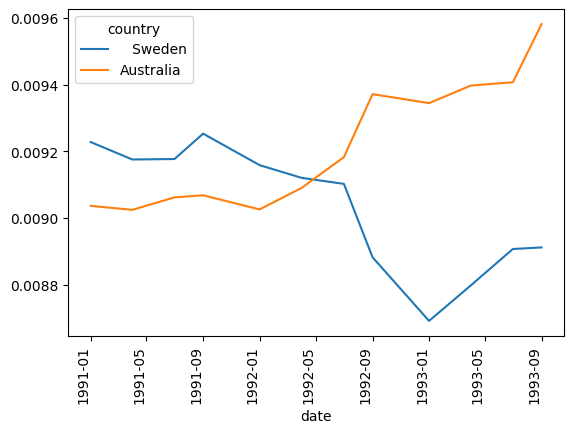

In [80]:
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['country','date'], fill_method='ffill')

# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop']

# Pivot data so gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', 'date', 'country')

# Select dates equal to or greater than 1991-01-01
recent_gdp_pop = gdp_pivot.query(' date >= "1991-01-01"')

# Plot recent_gdp_pop
recent_gdp_pop.plot(rot=90)
plt.show()

#### `Select the right .melt() arguments`
You are given a table named __inflation__. Chose the option to get the same output as the table below.

In [81]:
data = {
    'country': ['Brazil', 'Canada', 'France', 'India', 'Brazil', 'Canada', 'France', 'India', 'Brazil', 'Canada', 'France', 'India'],
    'indicator': ['Inflation %'] * 12,
    'year': [2017, 2017, 2017, 2017, 2018, 2018, 2018, 2018, 2019, 2019, 2019, 2019],
    'annual': [3.45, 1.60, 1.03, 2.49, 3.66, 2.27, 1.85, 4.86, 3.73, 1.95, 1.11, 7.66]
}

# Membuat DataFrame
inflation = pd.DataFrame(data)

#### Possible answers
- inflation.melt(id_vars=['country','indicator'], var_name='annual')
- inflation.melt(id_vars=['country'], var_name='indicator', value_name='annual')
- inflation.melt(id_vars=['country','indicator'], var_name='year', value_name='annual')
- inflation.melt(id_vars=['country'], var_name='year', value_name='annual')

In [82]:
inflation.melt(id_vars=['country','indicator'], var_name='annual')


,country,indicator,annual,value
0,Brazil,Inflation %,year,2017.00
1,Canada,Inflation %,year,2017.00
2,France,Inflation %,year,2017.00
3,India,Inflation %,year,2017.00
4,Brazil,Inflation %,year,2018.00
5,Canada,Inflation %,year,2018.00
6,France,Inflation %,year,2018.00
7,India,Inflation %,year,2018.00
8,Brazil,Inflation %,year,2019.00
9,Canada,Inflation %,year,2019.00


In [83]:
inflation = pd.read_excel('../../datasets/inflations.xlsx')
inflation.head()

,country,indicator,2017,2018,2019
0,Brazil,Inflation %,3.45,3.66,3.73
1,Canada,Inflation %,1.60,2.27,1.95
2,France,Inflation %,1.03,1.85,1.11
3,India,Inflation %,2.49,4.86,7.66


#### `Select the right .melt() arguments`
You are given a table named inflation. Chose the option to get the same output as the table below.
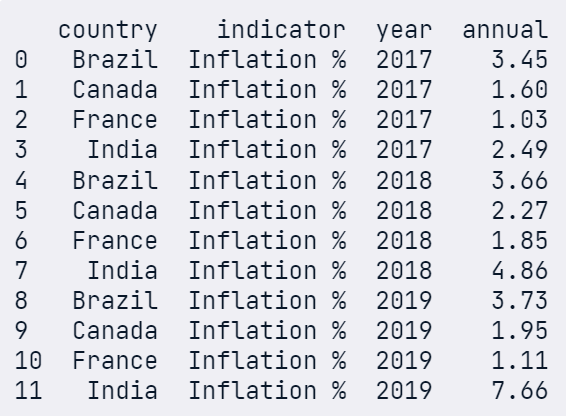

#### Possible answers

- inflation.melt(id_vars=['country','indicator'], var_name='annual')

- inflation.melt(id_vars=['country'], var_name='indicator', value_name='annual')

- `inflation.melt(id_vars=['country','indicator'], var_name='year', value_name='annual')`

- inflation.melt(id_vars=['country'], var_name='year', value_name='annual')



In [84]:
inflation.melt(id_vars=['country','indicator'], var_name='year', value_name='annual')

,country,indicator,year,annual
0,Brazil,Inflation %,2017,3.45
1,Canada,Inflation %,2017,1.60
2,France,Inflation %,2017,1.03
3,India,Inflation %,2017,2.49
4,Brazil,Inflation %,2018,3.66
5,Canada,Inflation %,2018,2.27
6,France,Inflation %,2018,1.85
7,India,Inflation %,2018,4.86
8,Brazil,Inflation %,2019,3.73
9,Canada,Inflation %,2019,1.95


#### `Using .melt() to reshape government data`
The US Bureau of Labor Statistics (BLS) often provides data series in an easy-to-read format - it has a separate column for each month, and each year is a different row. Unfortunately, this wide format makes it difficult to plot this information over time. In this exercise, you will reshape a table of US unemployment rate data from the BLS into a form you can plot using __.melt()__. You will need to add a date column to the table and sort by it to plot the data correctly.

The unemployment rate data has been loaded for you in a table called __ur_wide__. You are encouraged to view the table in the IPython shell before beginning the exercise.

In [85]:
ur_wide = pd.read_excel('../../datasets/ur_wide.xlsx')
ur_wide.head()

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,2010,9.8,9.8,9.9,9.9,9.6,9.4,9.4,9.5,9.5,9.4,9.8,9.3
1,2011,9.1,9.0,9.0,9.1,9.0,9.1,9.0,9.0,9.0,8.8,8.6,8.5
2,2012,8.3,8.3,8.2,8.2,8.2,8.2,8.2,8.1,7.8,7.8,7.7,7.9
3,2013,8.0,7.7,7.5,7.6,7.5,7.5,7.3,7.2,7.2,7.2,6.9,6.7
4,2014,6.6,6.7,6.7,6.2,6.3,6.1,6.2,6.1,5.9,5.7,5.8,5.6


- Use __.melt()__ to unpivot all of the columns of __ur_wide__ except __year__ and ensure that the columns with the months and values are named __month__ and __unempl_rate__, respectively. Save the result as __ur_tall__.
- Add a column to __ur_tall__ named __date__ which combines the __year__ and __month__ columns as year-month format into a larger string, and converts it to a date data type.
- Sort __ur_tall__ by date and save as __ur_sorted__.
- Using __ur_sorted__, plot __unempl_rate__ on the y-axis and __date__ on the x-axis.

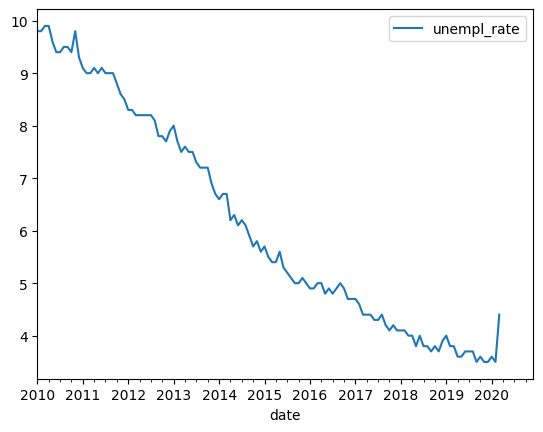

In [86]:
# unpivot everything besides the year column
ur_tall = ur_wide.melt(id_vars='year', var_name='month', value_name='unempl_rate')


# Create a date column using the month and year columns of ur_tall
# ur_tall['date'] = pd.to_datetime(ur_tall['year'] + '-' + ur_tall['month'])
ur_tall['date'] = pd.to_datetime(ur_tall['year'].astype(str) + '-' + ur_tall['month'], format='%Y-%b')

# Sort ur_tall by date in ascending order
ur_sorted = ur_tall.sort_values(by='date')

# Plot the unempl_rate by date
ur_sorted.plot(x='date', y='unempl_rate')
plt.show()

#### `Using .melt() for stocks vs bond performance`
It is widespread knowledge that the price of bonds is inversely related to the price of stocks. In this last exercise, you'll review many of the topics in this chapter to confirm this. You have been given a table of percent change of the US 10-year treasury bond price. It is in a wide format where there is a separate column for each year. You will need to use the __.melt()__ method to reshape this table.

Additionally, you will use the __.query()__ method to filter out unneeded data. You will merge this table with a table of the percent change of the Dow Jones Industrial stock index price. Finally, you will plot data.

The tables __ten_yr__ and __dji__ have been loaded for you.

In [87]:
ten_yr = pd.read_csv('../../datasets/ten_yr.csv')
ten_yr.head()

,2007-02-01,2007-03-01,2007-04-01,2007-05-01,2007-06-01,2007-07-01,2007-08-01,2007-09-01,2007-10-01,2007-11-01,...,2009-03-01,2009-04-01,2009-05-01,2009-06-01,2009-07-01,2009-08-01,2009-09-01,2009-10-01,2009-11-01,2009-12-01
0,0.033,-0.060,0.025,-0.004,0.061,0.027,-0.059,-0.046,0.014,-0.027,...,0.046,-0.103,0.191,0.107,0.024,-0.007,-0.047,-0.032,0.034,-0.051
1,-0.007,-0.041,0.022,0.031,0.080,-0.022,-0.060,-0.038,0.004,-0.056,...,-0.004,0.041,0.187,0.068,-0.062,0.032,-0.090,0.012,-0.004,0.099
2,-0.016,-0.008,0.031,-0.002,0.059,-0.027,-0.052,-0.043,0.003,-0.108,...,-0.062,0.069,0.168,0.123,-0.055,0.040,-0.036,-0.051,0.030,0.007
3,-0.057,0.022,-0.004,0.056,0.029,-0.052,-0.049,0.009,-0.023,-0.112,...,-0.117,0.164,0.109,0.017,-0.006,-0.029,-0.028,0.026,-0.056,0.201


In [88]:
dji = pd.read_excel('../../datasets/dji.xlsx')
dji.head()

,date,close
0,2007-02-01,5.094
1,2007-03-01,-26.140
2,2007-04-01,48.530
3,2007-05-01,52.010
4,2007-06-01,-16.070


- Use __.melt()__ on __ten_yr__ to __unpivot__ everything except the metric column, setting __var_name='date'__ and __value_name='close'__. Save the result to __bond_perc__.
- Using the __.query()__ method, select only those rows were __metric__ equals __'close'__, and save to __bond_perc_close__.
- Use __merge_ordered()__ to merge __dji__ (left table) and __bond_perc_close__ on __date__ with an inner join, and set suffixes equal to __('_dow', '_bond')__. Save the result to __dow_bond__.
- Using __dow_bond__, __plot only__ the __Dow__ and __bond values__.

In [90]:

# Use melt on ten_yr, unpivot everything besides the metric column
bond_perc = ten_yr.melt(id_vars=['metric'], var_name='date', value_name='close')

# Use query on bond_perc to select only the rows where metric=close
bond_perc_close = bond_perc.query("metric == 'close'")

# Merge (ordered) dji and bond_perc_close on date with an inner join
dow_bond = pd.merge_ordered(dji, bond_perc_close, on='date', how='inner', suffixes=('_dow', '_bond'))

# Plot only the close_dow and close_bond columns
dow_bond.plot(kind='line', x='date', y=['close_dow', 'close_bond'], rot=90)
plt.show()


KeyError: "The following 'id_vars' are not present in the DataFrame: ['metric']"